# Analysing the dataset

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import OrderedDict
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

**Reading the dataset**

in ibm watson studio

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_eef7b439b5aa447aa985287da53eeff2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p0jWfHwV87tTPcvGQBpGYNjfW-yA2GJWemmLqxW-29Pq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_eef7b439b5aa447aa985287da53eeff2.get_object(Bucket='ple-donotdelete-pr-dwgdltg2swuaks',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
data= pd.read_csv(body)


Country- Country    
Year- Year    
Status- Developed or Developing status    
Life Expectancy- Age(years)   
Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)         
Infant Deaths- Number of Infant Deaths per 1000 population        
Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)   
Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)   
Measles- number of reported measles cases per 1000 population    
BMI- Average Body Mass Index of entire population    
U-5 Deaths- Number of under-five deaths per 1000 population    
Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)    
Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)    
Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)      
HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)    
GDP- Gross Domestic Product per capita(in USD)   
Population- Population          
Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)    
Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)    
Income Composition- Human Development Index in terms of income composition of resources(0-1)  
Schooling- Number of years of Schooling  

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape #(2938, 22)

(2938, 22)

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Handling Missing value 

In [8]:
country_list = data.Country.unique()
len(country_list)

193

In [9]:
country_list = data.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

**Filling missing value according to country column using interpolate()**

In [10]:
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()
data.dropna(inplace=True)

In [11]:
data.shape  #(1987, 22) size reduced

(1987, 22)

In [12]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Corelation matrix

In [13]:
corrMatrix = data.corr()
corrMatrix.style.background_gradient(cmap='plasma', low=.5, high=0).highlight_null('red')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1,0.171485,-0.072108,-0.0376009,-0.046859,0.0890962,0.247259,-0.0995545,0.0960594,-0.0424786,0.117642,0.0741388,0.166006,-0.142581,0.119355,0.0227754,-0.0474773,-0.0534833,0.2429,0.225046
Life expectancy,0.171485,1,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,0.415188,0.199288,0.442943,-0.576373,0.443612,-0.0108395,-0.458724,-0.450095,0.726753,0.744703
Adult Mortality,-0.072108,-0.660529,1,0.038304,-0.181469,-0.242438,-0.103382,-0.00726893,-0.372519,0.0528647,-0.208006,-0.0967268,-0.210136,0.536273,-0.256955,-0.0224033,0.278842,0.284581,-0.41101,-0.40416
infant deaths,-0.0376009,-0.160922,0.038304,1,-0.104406,-0.0897719,-0.216949,0.509747,-0.227769,0.996729,-0.152153,-0.147961,-0.15647,0.00173889,-0.0977204,0.562805,0.48158,0.487596,-0.137175,-0.195815
Alcohol,-0.046859,0.392617,-0.181469,-0.104406,1,0.430835,0.106383,-0.0292517,0.379327,-0.0997129,0.239854,0.227108,0.245454,-0.0337557,0.458112,-0.0255555,-0.398731,-0.387087,0.532173,0.590261
percentage expenditure,0.0890962,0.413683,-0.242438,-0.0897719,0.430835,1,-0.0115303,-0.069316,0.277788,-0.0924802,0.162606,0.217103,0.16891,-0.10968,0.963177,-0.0166065,-0.268347,-0.268131,0.408174,0.426801
Hepatitis B,0.247259,0.249625,-0.103382,-0.216949,0.106383,-0.0115303,1,-0.142059,0.198627,-0.226512,0.451299,0.130435,0.552732,-0.104034,0.00907705,-0.092418,-0.166903,-0.181161,0.239386,0.268951
Measles,-0.0995545,-0.138133,-0.00726893,0.509747,-0.0292517,-0.069316,-0.142059,1,-0.168172,0.519173,-0.113574,-0.111638,-0.119828,0.0195997,-0.0738583,0.26984,0.227961,0.223325,-0.137648,-0.146625
BMI,0.0960594,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1,-0.238155,0.264753,0.233643,0.266601,-0.239171,0.300517,-0.0713058,-0.560982,-0.567943,0.539862,0.584998
under-five deaths,-0.0424786,-0.187438,0.0528647,0.996729,-0.0997129,-0.0924802,-0.226512,0.519173,-0.238155,1,-0.169989,-0.148325,-0.177302,0.0133901,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678


Thinness 1-19 years must be thinness 10-19 years

**Renaming the columns as it contains trailing spaces**

In [14]:
data.rename(columns={" BMI ":"BMI",'Life expectancy ':'Life expectancy',
                  "under-five deaths ":"under-five deaths","Measles ":"Measles","Diphtheria ":"Diphtheria",
                  ' HIV/AIDS':"HIV/AIDS",
                  " thinness  1-19 years":"thinness 10-19 years"," thinness 5-9 years":"thinness 5-9 years"},inplace=True)

# Removing outliers

Taking numeric features , (country,year, status columns are excluded)

In [15]:
col_dict = {'Life expectancy':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'percentage expenditure': 4, 'Hepatitis B': 5,
       'Measles' : 6, 'BMI': 7, 'under-five deaths' : 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'thinness 10-19 years' :15, 'thinness 5-9 years' :16,
       'Income composition of resources' : 17, 'Schooling' :18, 'infant deaths':19}

**Showing outliers using box plot**

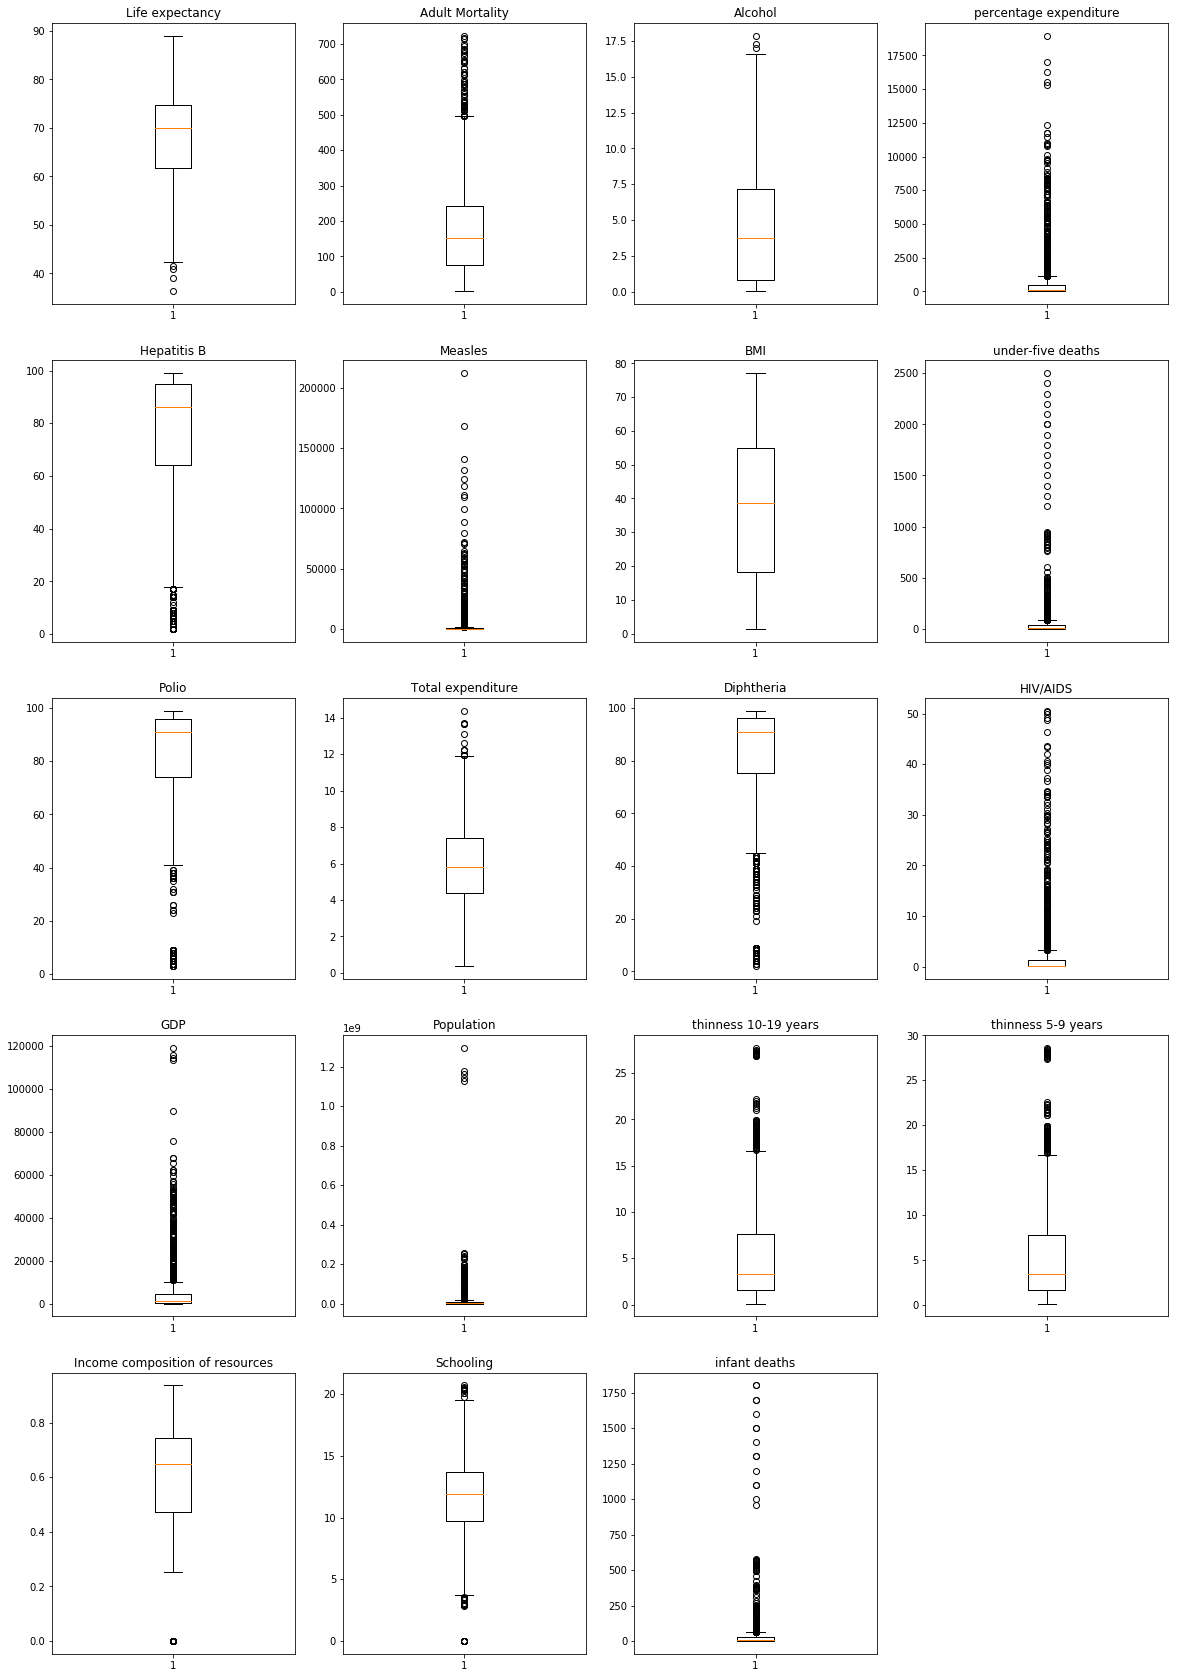

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

**BMI has no outliers**

In [17]:
import numpy as np

for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0])),
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in under-five deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and percentage of it in HIV/AIDS : 309 and 15.551082033215904
Number of ou

**18 columns having outliers**

as BMI has no outliers

In [18]:
from scipy.stats.mstats import winsorize
winsorized_Life_Expectancy = winsorize(data['Life expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(data['Adult Mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(data['infant deaths'],(0,0.10))
winsorized_Alcohol = winsorize(data['Alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(data['percentage expenditure'],(0,0.12))
winsorized_HepatitisB = winsorize(data['Hepatitis B'],(0.11,0))
winsorized_Measles = winsorize(data['Measles'],(0,0.19))
winsorized_Under_Five_Deaths = winsorize(data['under-five deaths'],(0,0.12))
winsorized_Polio = winsorize(data['Polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(data['Total expenditure'],(0,0.01))
winsorized_Diphtheria = winsorize(data['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(data['HIV/AIDS'],(0,0.16))
winsorized_GDP = winsorize(data['GDP'],(0,0.13))
winsorized_Population = winsorize(data['Population'],(0,0.14))
winsorized_thinness_10_19_years = winsorize(data['thinness 10-19 years'],(0,0.04))
winsorized_thinness_5_9_years = winsorize(data['thinness 5-9 years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(data['Income composition of resources'],(0.05,0))
winsorized_Schooling = winsorize(data['Schooling'],(0.02,0.01))

In [19]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Measles,winsorized_Infant_Deaths,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,
            winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_10_19_years,winsorized_thinness_5_9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in winsorized_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization in  : {} ".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 


**Adding 18 new columns having no outliers to the dataframe**

In [20]:
data['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
data['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
data['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
data['winsorized_Alcohol'] = winsorized_Alcohol
data['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
data['winsorized_HepatitisB'] = winsorized_HepatitisB
data['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
data['winsorized_Polio'] = winsorized_Polio
data['winsorized_Tot_Exp'] = winsorized_Tot_Exp
data['winsorized_Diphtheria'] = winsorized_Diphtheria
data['winsorized_HIV'] = winsorized_HIV
data['winsorized_GDP'] = winsorized_GDP
data['winsorized_Population'] = winsorized_Population
data['winsorized_thinness_10_19_years'] = winsorized_thinness_10_19_years
data['winsorized_thinness_5_9_years'] = winsorized_thinness_5_9_years
data['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
data['winsorized_Schooling'] = winsorized_Schooling
data['winsorized_Measles'] = winsorized_Measles

In [21]:
data.shape #More 18 columns are added

(1987, 40)

# EDA

In [22]:
data.columns


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

**Hence all the features are significant to predict the target variable**

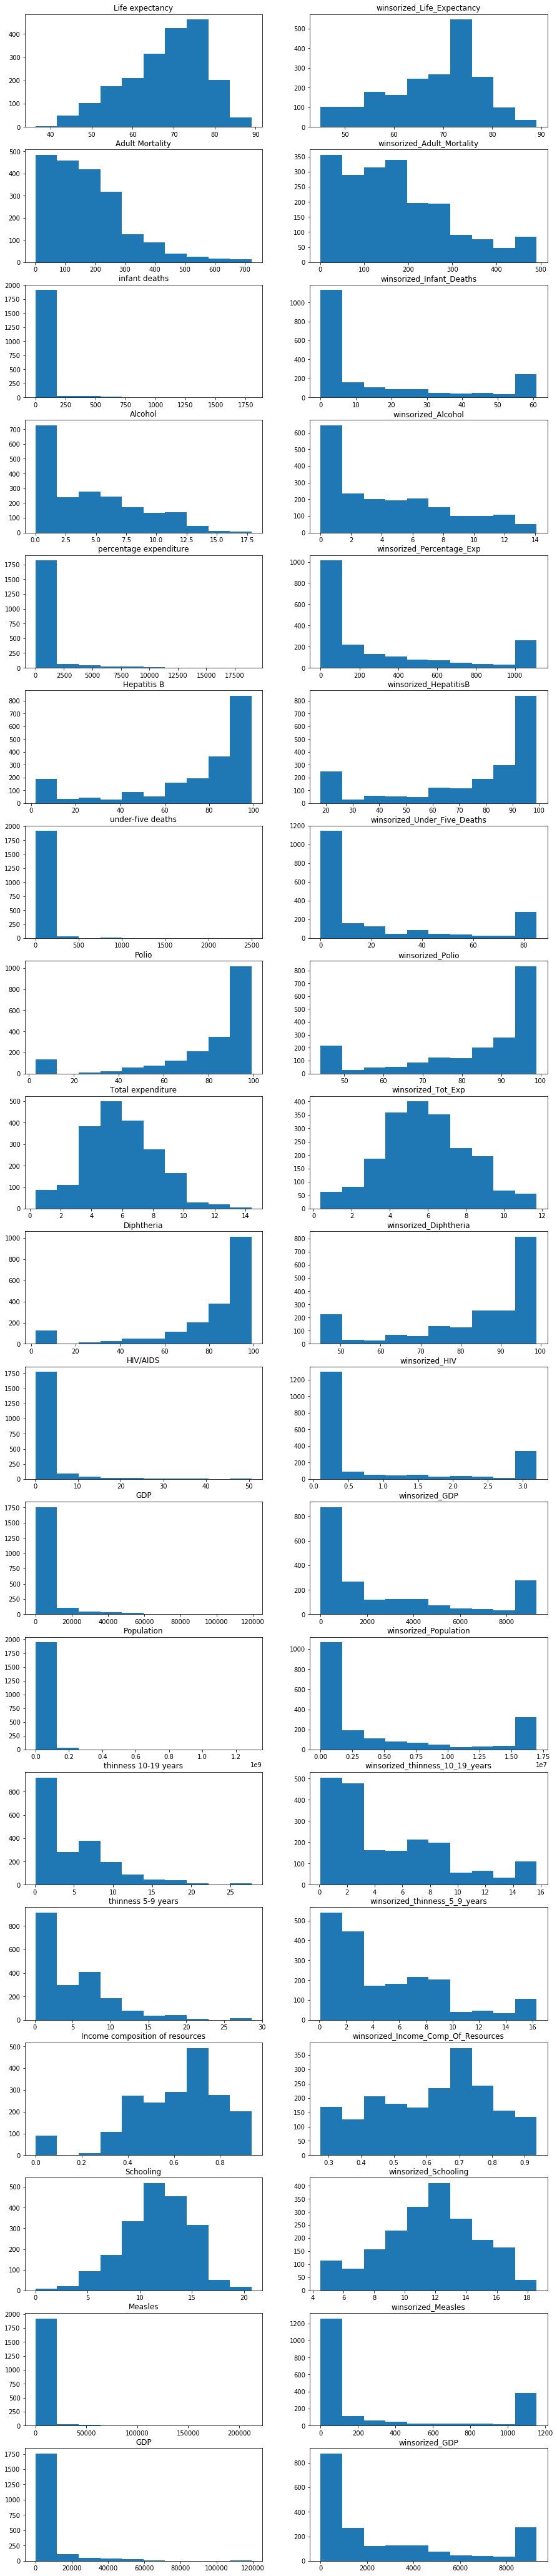

In [23]:
col = ['Life expectancy','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','infant deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','percentage expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','under-five deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total expenditure',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness 10-19 years','winsorized_thinness_10_19_years','thinness 5-9 years',
         'winsorized_thinness_5_9_years','Income composition of resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,75))

for i in range(len(col)):
    plt.subplot(19,2,i+1)
    plt.hist(data[col[i]])
    plt.title(col[i])

plt.show()

In [24]:
data.describe(include= 'O') #include specifies the list of datatype to be incluyded .here is Object

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


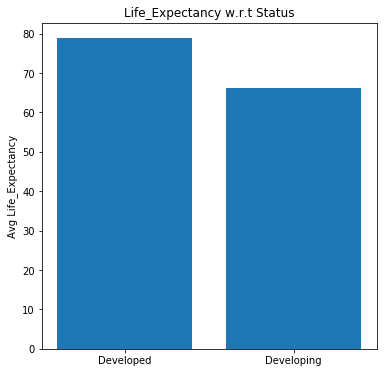

In [25]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index,data.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.ylabel("Avg Life_Expectancy")
plt.title("Life_Expectancy w.r.t Status")
plt.show()

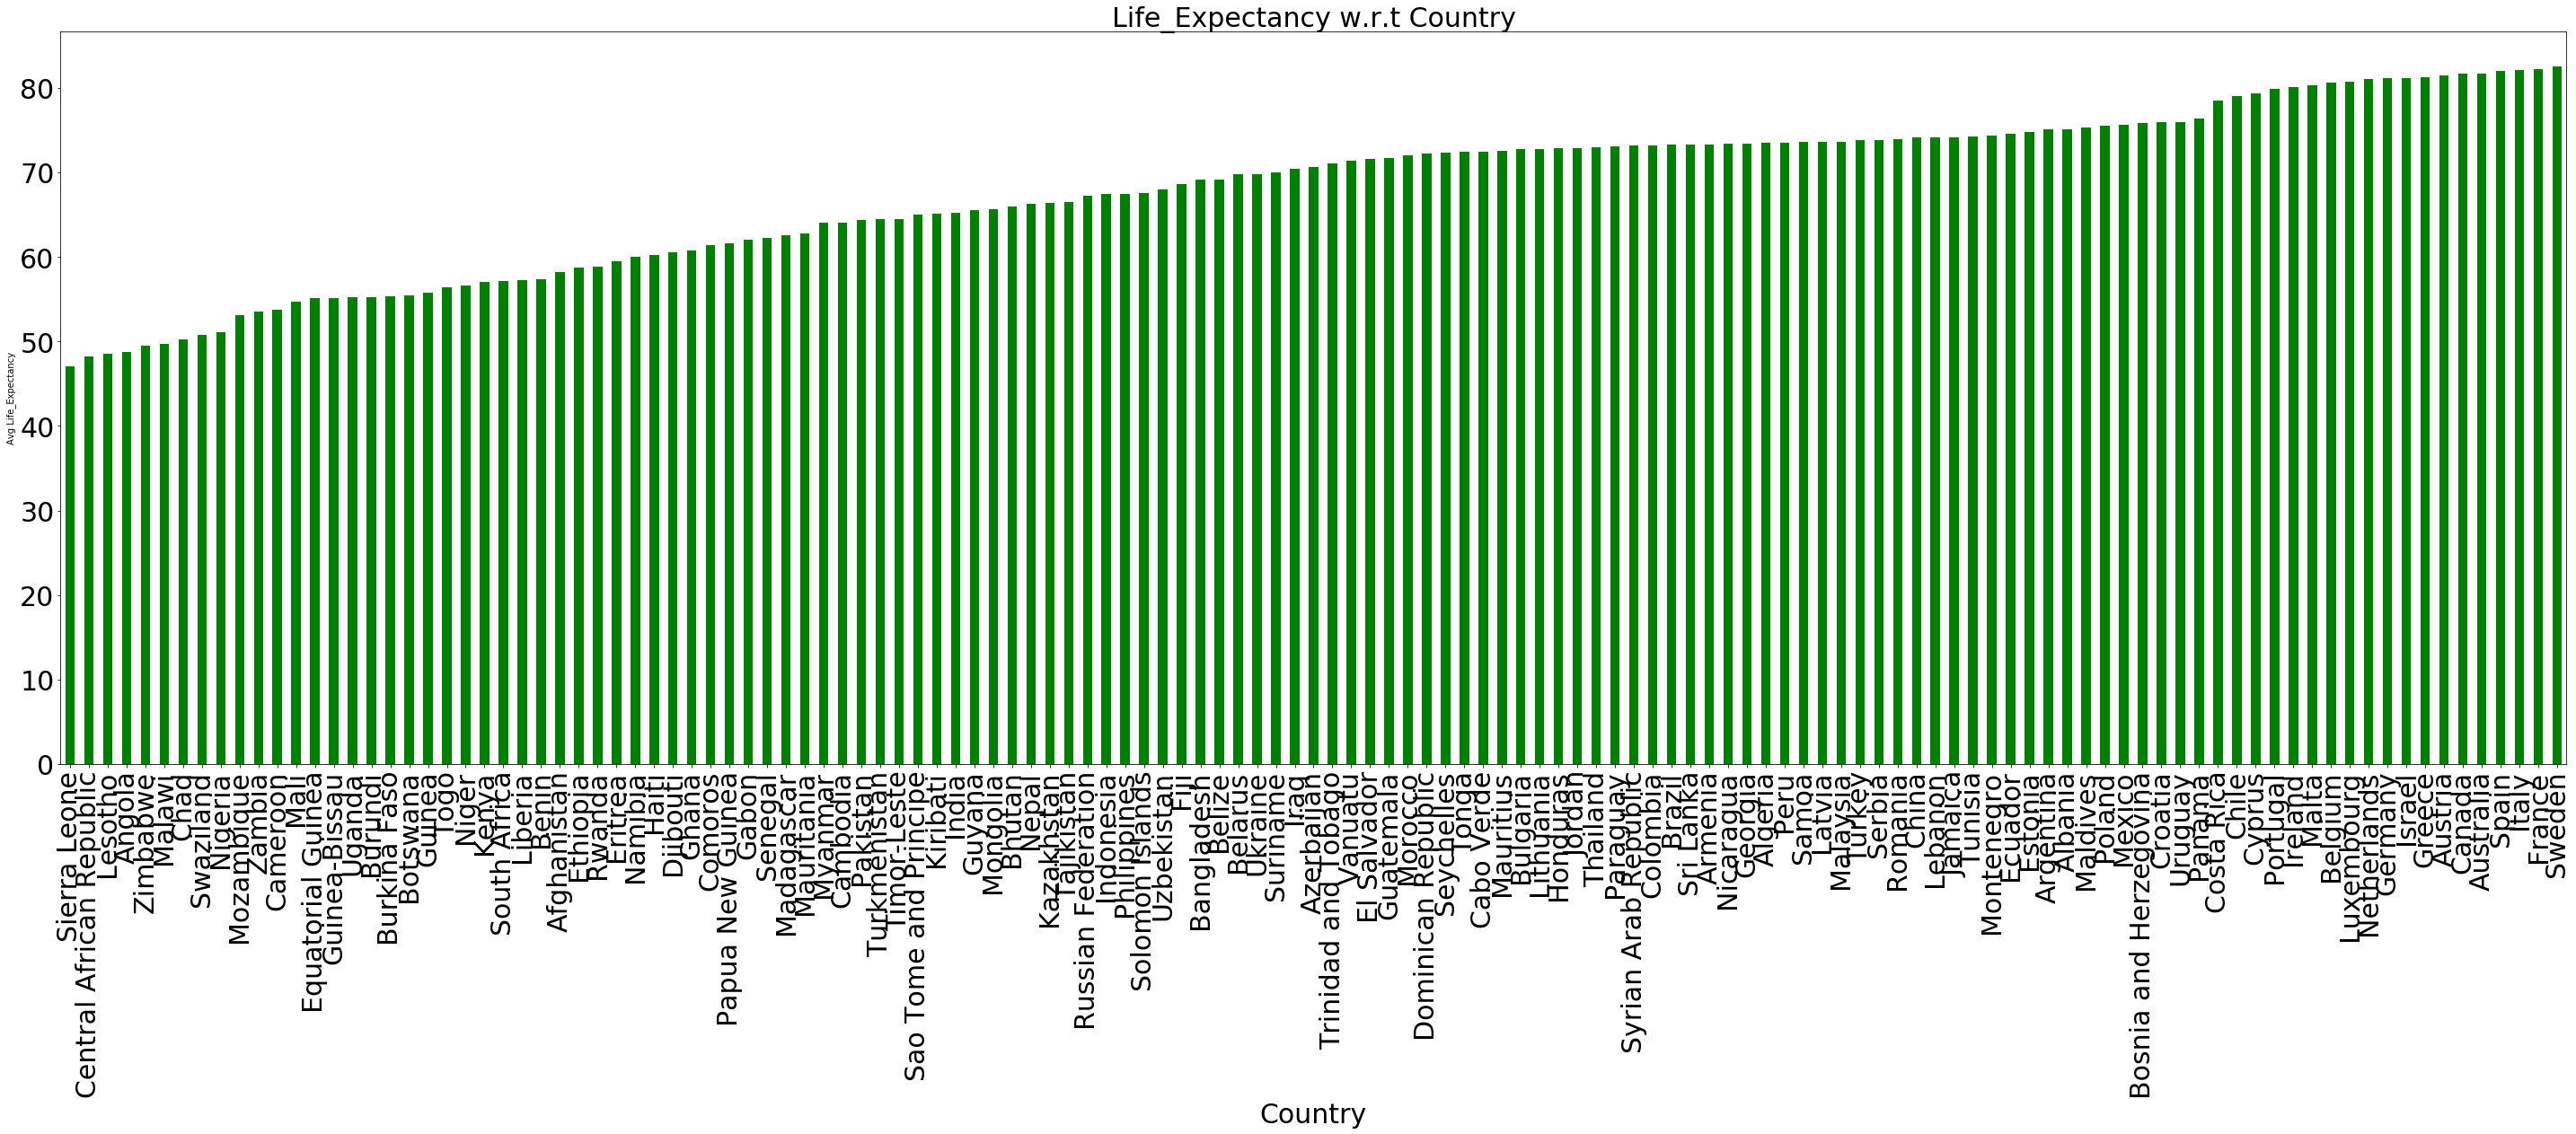

In [26]:
country_data = data.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values(ascending=True)
country_data.plot(kind='bar' ,figsize=(50,15),fontsize=30,color='g')
plt.title("Life_Expectancy w.r.t Country",fontsize=30)
plt.xlabel("Country",fontsize=30)
plt.ylabel("Avg Life_Expectancy")
plt.show()

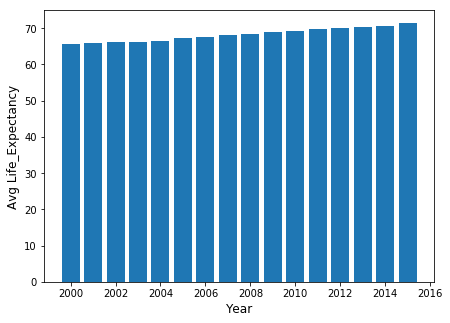

In [27]:
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index,data.groupby('Year')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.show()

In [28]:
cor_matrix=data.corr()
print(cor_matrix['winsorized_Life_Expectancy'].sort_values(ascending=False))

winsorized_Life_Expectancy             1.000000
Life expectancy                        0.999564
winsorized_Income_Comp_Of_Resources    0.823222
winsorized_Schooling                   0.762333
Schooling                              0.746461
Income composition of resources        0.728270
BMI                                    0.601434
winsorized_Percentage_Exp              0.557117
winsorized_GDP                         0.551722
winsorized_Diphtheria                  0.535687
winsorized_Polio                       0.516167
GDP                                    0.445022
Diphtheria                             0.443489
Polio                                  0.415868
percentage expenditure                 0.415074
winsorized_Alcohol                     0.396073
Alcohol                                0.394380
winsorized_HepatitisB                  0.268086
Hepatitis B                            0.250284
winsorized_Tot_Exp                     0.208400
Total expenditure                      0

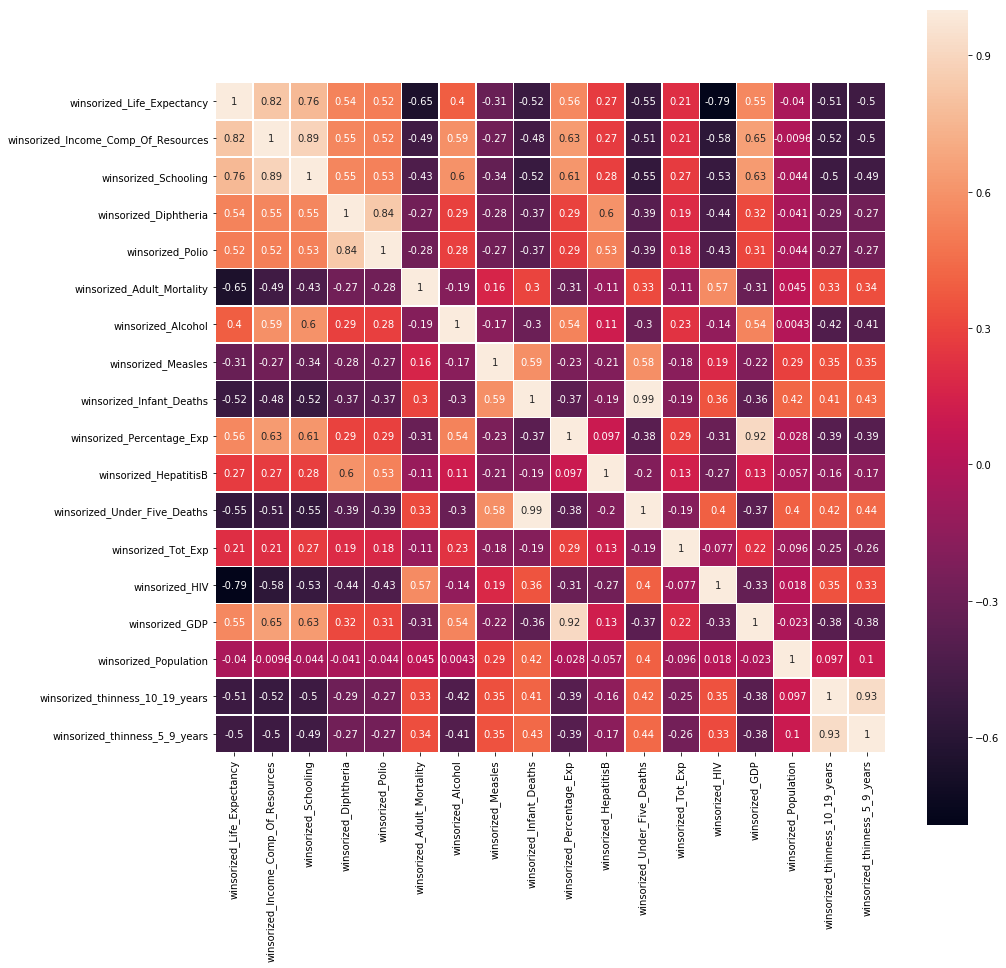

In [29]:
import seaborn as sns
from pandas.plotting import scatter_matrix
attributes= ['winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_Schooling'
,'winsorized_Diphtheria','winsorized_Polio','winsorized_Adult_Mortality','winsorized_Alcohol','winsorized_Measles','winsorized_Infant_Deaths',
            'winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Under_Five_Deaths','winsorized_Tot_Exp',
            'winsorized_HIV','winsorized_GDP','winsorized_Population','winsorized_thinness_10_19_years','winsorized_thinness_5_9_years']
cormat=data[attributes].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.show()

In [30]:
round(data[['Status','winsorized_Life_Expectancy']].groupby(['Status']).mean(),2)

,winsorized_Life_Expectancy
Status,
Developed,78.83
Developing,66.19


Since 'status' is a categorical feature, we have to find the correlation with Life expectancy 

In [31]:
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','winsorized_Life_Expectancy'],data.loc[data['Status']=='Developing','winsorized_Life_Expectancy'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)

In [32]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

**Now our data has no null values and no outliers**

# Creating a new dataframe with refined data

In [33]:
new_data=pd.DataFrame(data=data,columns=['Country', 'Year', 'Status', 
        'BMI', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles',   
       'winsorized_Life_Expectancy'])

In [34]:
new_data.shape

(1987, 22)

In [35]:
new_data.head()

,Country,Year,Status,BMI,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,...,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_10_19_years,winsorized_thinness_5_9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles,winsorized_Life_Expectancy
0,Afghanistan,2015,Developing,19.1,263.0,61,0.01,71.279624,65.0,83,...,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1,1154,65.0
1,Afghanistan,2014,Developing,18.6,271.0,61,0.01,73.523582,62.0,85,...,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0,492,59.9
2,Afghanistan,2013,Developing,18.1,268.0,61,0.01,73.219243,64.0,85,...,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9,430,59.9
3,Afghanistan,2012,Developing,17.6,272.0,61,0.01,78.184215,67.0,85,...,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8,1154,59.5
4,Afghanistan,2011,Developing,17.2,275.0,61,0.01,7.097109,68.0,85,...,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5,1154,59.2


In [36]:
new_data.rename(columns={  
             'winsorized_Adult_Mortality':'Adult_Mortality',
       'winsorized_Infant_Deaths' :'Infant_Deaths',
       'winsorized_Alcohol':'Alcohol',
       'winsorized_Percentage_Exp':'Percentage_Expenditure',
       'winsorized_HepatitisB':'Hepatitis_B',
       'winsorized_Under_Five_Deaths':'Under_Five_Deaths',
       'winsorized_Polio':'Polio',
       'winsorized_Tot_Exp':'Total_Expenditure',
       'winsorized_Diphtheria':'Diphtheria',
       'winsorized_HIV':'HIV/AIDS',
       'winsorized_GDP':'GDP',
       'winsorized_Population':'Population',
       'winsorized_thinness_10_19_years':'Thinness_10_19_years',
       'winsorized_thinness_5_9_years':'Thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources':'Income_Composition_of_Resources',
       'winsorized_Schooling':'Schooling',
       'winsorized_Measles':'Measles',
       'winsorized_Life_Expectancy':'Life_Expectancy' } ,inplace=True)

In [37]:
new_data.head()

,Country,Year,Status,BMI,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Under_Five_Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10_19_years,Thinness_5_9_years,Income_Composition_of_Resources,Schooling,Measles,Life_Expectancy
0,Afghanistan,2015,Developing,19.1,263.0,61,0.01,71.279624,65.0,83,...,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1,1154,65.0
1,Afghanistan,2014,Developing,18.6,271.0,61,0.01,73.523582,62.0,85,...,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0,492,59.9
2,Afghanistan,2013,Developing,18.1,268.0,61,0.01,73.219243,64.0,85,...,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9,430,59.9
3,Afghanistan,2012,Developing,17.6,272.0,61,0.01,78.184215,67.0,85,...,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8,1154,59.5
4,Afghanistan,2011,Developing,17.2,275.0,61,0.01,7.097109,68.0,85,...,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5,1154,59.2


In [38]:
new_data.columns

Index(['Country', 'Year', 'Status', 'BMI', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Under_Five_Deaths',
       'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness_10_19_years', 'Thinness_5_9_years',
       'Income_Composition_of_Resources', 'Schooling', 'Measles',
       'Life_Expectancy'],
      dtype='object')

**Separating the input features and label**

In [39]:
X = new_data.drop('Life_Expectancy', axis=1)
Y = pd.DataFrame(data=new_data,columns=['Life_Expectancy'])

In [40]:
X.head()

,Country,Year,Status,BMI,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Under_Five_Deaths,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10_19_years,Thinness_5_9_years,Income_Composition_of_Resources,Schooling,Measles
0,Afghanistan,2015,Developing,19.1,263.0,61,0.01,71.279624,65.0,83,...,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1,1154
1,Afghanistan,2014,Developing,18.6,271.0,61,0.01,73.523582,62.0,85,...,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0,492
2,Afghanistan,2013,Developing,18.1,268.0,61,0.01,73.219243,64.0,85,...,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9,430
3,Afghanistan,2012,Developing,17.6,272.0,61,0.01,78.184215,67.0,85,...,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8,1154
4,Afghanistan,2011,Developing,17.2,275.0,61,0.01,7.097109,68.0,85,...,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5,1154


In [41]:
Y.head()

,Life_Expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


**Spilitting the data into train set and test set**

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Creating a pipeline

In [43]:
numeric_features = ['Year', 'BMI',
       'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
       'Hepatitis_B', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10_19_years',
       'Thinness_5_9_years', 'Income_Composition_of_Resources', 'Schooling',
       'Measles']
categorical_features = ['Country', 'Status']

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
   
])

In [46]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Finding best algorithm

In [47]:
models = OrderedDict([
    ( "Linear Regression",       Pipeline([
                                            ('preprocessor', preprocessor),
                                            ('LRegressor', LinearRegression())])  ),
    ( "Decision Tree Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('DTRegressor', DecisionTreeRegressor())])  ),
    ( "Random Forest Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('RFRegressor', RandomForestRegressor())])  ),
    
])

In [48]:
scores = {}
for (name, model) in models.items():
  model.fit(X_train,Y_train)
  scores[name] =r2_score(model.predict(X_test), Y_test)
    
scores = OrderedDict(sorted(scores.items()))
scores

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


OrderedDict([('Decision Tree Regressor', 0.9236313925977002),
             ('Linear Regression', 0.8188082000368992),
             ('Random Forest Regressor', 0.9541468921408416)])

**Hence Random forest regression is the most suitable algorithm for this dataset**

# Random forest regression

In [49]:
RFRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('RFRegressor', RandomForestRegressor())
])

In [50]:
RFRegressor.fit(X_train,Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [51]:
predict= RFRegressor.predict(X_test)

In [52]:
r2_score(predict, Y_test)

0.9602966000123109

# Deploying model

In [53]:
!pip install watson-machine-learning-client

In [54]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-08 16:27:46,753 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [55]:
wml_credentials={
  "apikey": "tBia_3Su_kmaBT6AQ916ZT_-ESNfuGm013-i69fNx58y",
  "iam_apikey_description": "Auto-generated for key 970629b9-401e-4f7a-87b1-3d635afee725",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/2d98f35fa21c44c1bb89df56f5ea1abe::serviceid:ServiceId-699001f1-a5e9-411b-81f7-0f927a6d153b",
  "instance_id": "d8c4be17-d39e-4cc5-9b8c-49a9bedeee5b",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [56]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [57]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "faisal", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "faisalahmad78688@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_expectancy"}

In [58]:
model_artifact =client.repository.store_model(RFRegressor, meta_props=model_props)

In [59]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'5eaf40c4-0b86-4f76-b21d-c64f10b5c090'

In [60]:
deployment = client.deployments.create(published_model_uid, name="life_expectancy")
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint



#######################################################################################

Synchronous deployment creation for uid: '5eaf40c4-0b86-4f76-b21d-c64f10b5c090' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6fe4d197-85a0-4734-b287-480a33f88081'
------------------------------------------------------------------------------------------------




'https://us-south.ml.cloud.ibm.com/v3/wml_instances/d8c4be17-d39e-4cc5-9b8c-49a9bedeee5b/deployments/6fe4d197-85a0-4734-b287-480a33f88081/online'

In [61]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
6fe4d197-85a0-4734-b287-480a33f88081  life_expectancy  online  DEPLOY_SUCCESS  2020-06-08T16:27:51.562Z  scikit-learn-0.20  model
8a3a4557-7dfd-4a8c-ad7d-9419afcea962  life_expectancy  online  DEPLOY_SUCCESS  2020-06-08T14:04:56.840Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
